In [2]:
pip install tensorflow

  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl (284.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
                                              0.0/413.2 kB ? eta -:--:--
                                              10.2/413.2 kB ? eta -:--:--
     -----                                   61.4/413.2 kB 1.1 MB/s eta 0:00:01
     ---------------                        163.8/413.2 kB 1.4 MB/s eta 0:00:01
     ----------------------                 245.8/413.2 kB 1.5 MB/s eta 0:00:01
     -----------------------------         

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wandb 0.15.4 requires pathtools, which is not installed.


In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [3]:
df = df['original_title']

In [4]:
df

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: original_title, Length: 4803, dtype: object

In [5]:
movie_name = df.to_list()

In [6]:
movie_name

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [7]:
movie_name[1]

"Pirates of the Caribbean: At World's End"

In [8]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(movie_name)
seq = tokenizer.texts_to_sequences(movie_name)

In [9]:
seq[1]

[210, 2, 1, 431, 47, 432, 72]

In [10]:
seq[:10]

[[1564],
 [210, 2, 1, 431, 47, 432, 72],
 [1565],
 [1, 52, 211, 1566],
 [212, 601],
 [213, 8, 21],
 [1567],
 [902, 146, 2, 1568],
 [110, 214, 4, 1, 433, 53, 147],
 [173, 340, 261, 85, 2, 903]]

In [11]:
len(seq)

4803

In [12]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'a': 3,
 'and': 4,
 'in': 5,
 '2': 6,
 'to': 7,
 'man': 8,
 'i': 9,
 'love': 10,
 'with': 11,
 'on': 12,
 'me': 13,
 'my': 14,
 'movie': 15,
 'you': 16,
 'dead': 17,
 'last': 18,
 'for': 19,
 'from': 20,
 '3': 21,
 'good': 22,
 'big': 23,
 'day': 24,
 'house': 25,
 'ii': 26,
 'american': 27,
 'men': 28,
 'it': 29,
 'story': 30,
 'life': 31,
 'black': 32,
 'girl': 33,
 'all': 34,
 'out': 35,
 'time': 36,
 'night': 37,
 'is': 38,
 'world': 39,
 'days': 40,
 'star': 41,
 'part': 42,
 'new': 43,
 'de': 44,
 'little': 45,
 'la': 46,
 'at': 47,
 'up': 48,
 'an': 49,
 'die': 50,
 'city': 51,
 'dark': 52,
 'blood': 53,
 'game': 54,
 'one': 55,
 'red': 56,
 'blue': 57,
 'your': 58,
 'iii': 59,
 'kill': 60,
 'war': 61,
 'white': 62,
 'street': 63,
 'lost': 64,
 'christmas': 65,
 'legend': 66,
 'wild': 67,
 'how': 68,
 'road': 69,
 'boys': 70,
 'high': 71,
 'end': 72,
 'down': 73,
 'home': 74,
 'hard': 75,
 'boy': 76,
 'year': 77,
 'like': 78,
 'x': 79,
 'bad': 80,
 'do': 81

In [13]:
tokenizer.word_index["world's"]

432

In [14]:
X = []
y = []
total_words_dropped = 0

for i in seq:
    if len(i) > 1:
        for index in range(1, len(i)):
            X.append(i[:index])
            y.append(i[index])
    else:
        total_words_dropped += 1

print("Total Single Words Dropped are:", total_words_dropped)

Total Single Words Dropped are: 1003


In [15]:
X[:10]

[[210],
 [210, 2],
 [210, 2, 1],
 [210, 2, 1, 431],
 [210, 2, 1, 431, 47],
 [210, 2, 1, 431, 47, 432],
 [1],
 [1, 52],
 [1, 52, 211],
 [212]]

In [16]:
y[:10]

[2, 1, 431, 47, 432, 72, 52, 211, 1566, 601]

In [17]:
def get_keys_by_value(dictionary, target_value):
    keys = []
    for key, value in dictionary.items():
        if value == target_value:
            keys.append(key)
    return keys
keys_for_value = get_keys_by_value(tokenizer.word_index, 1)
print(keys_for_value) 

['the']


In [18]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [19]:
X

array([[  0,   0,   0, ...,   0,   0, 210],
       [  0,   0,   0, ...,   0, 210,   2],
       [  0,   0,   0, ..., 210,   2,   1],
       ...,
       [  0,   0,   0, ...,   0,   0,  14],
       [  0,   0,   0, ...,   0,  14, 300],
       [  0,   0,   0, ...,  14, 300,  11]])

In [20]:
X.shape

(8483, 14)

In [21]:
y = tf.keras.utils.to_categorical(y)

In [22]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
y.shape

(8483, 5045)

In [24]:
vocab_size = len(tokenizer.word_index) + 1

In [25]:
vocab_size

5045

When the argument  return_sequences  is set to  False  (default), the network will only output the hidden state at the final time step, denoted as h_n. Alternatively, if the argument is not set to  False  , the network will output the complete sequence of hidden states, represented as [h_1, h_2, ..., h_n]. 

In [26]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 14),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(vocab_size, activation='softmax'),
])


The output of an LSTM (Long Short-Term Memory) layer with 100 units and without return_sequences=True is a fixed-size context vector that summarizes the information learned from the input sequence. This context vector is typically the hidden state of the LSTM at the final time step.

The output shape of this LSTM layer is (batch_size, 100) or (None, 100) depending on whether the batch_size is specified or not. In this context vector, each of the 100 units represents a different aspect of the sequence's learned context. This context vector is then passed as input to the next layer in your neural network architecture.

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 14)          70630     
                                                                 
 bidirectional (Bidirection  (None, None, 200)         92000     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 5045)              509545    
                                                                 
Total params: 933075 (3.56 MB)
Trainable params: 933075 

In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import TensorBoard

log_dir = "logs/fit_biLSTM/"  
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [30]:
model.fit(X, y, epochs=150, callbacks=[tensorboard_callback],validation_split=0.02)

Epoch 1/150
260/260 [==============================] - 16s 39ms/step - loss: 7.7145 - accuracy: 0.0552 - val_loss: 7.8016 - val_accuracy: 0.0588
Epoch 2/150
260/260 [==============================] - 9s 33ms/step - loss: 7.0774 - accuracy: 0.0611 - val_loss: 8.1244 - val_accuracy: 0.0588
Epoch 3/150
260/260 [==============================] - 9s 35ms/step - loss: 6.8048 - accuracy: 0.0841 - val_loss: 8.2891 - val_accuracy: 0.0824
Epoch 4/150
260/260 [==============================] - 9s 34ms/step - loss: 6.5723 - accuracy: 0.0906 - val_loss: 8.5644 - val_accuracy: 0.0882
Epoch 5/150
260/260 [==============================] - 9s 35ms/step - loss: 6.4102 - accuracy: 0.0961 - val_loss: 9.1985 - val_accuracy: 0.0941
Epoch 6/150
260/260 [==============================] - 9s 35ms/step - loss: 6.2854 - accuracy: 0.1008 - val_loss: 9.4703 - val_accuracy: 0.0941
Epoch 7/150
260/260 [==============================] - 9s 34ms/step - loss: 6.1706 - accuracy: 0.1039 - val_loss: 10.0382 - val_accurac

260/260 [==============================] - 9s 36ms/step - loss: 1.8587 - accuracy: 0.5547 - val_loss: 35.3955 - val_accuracy: 0.0824
Epoch 114/150
260/260 [==============================] - 9s 36ms/step - loss: 1.8537 - accuracy: 0.5626 - val_loss: 35.2328 - val_accuracy: 0.0706
Epoch 115/150
260/260 [==============================] - 9s 35ms/step - loss: 1.8483 - accuracy: 0.5629 - val_loss: 34.8175 - val_accuracy: 0.0647
Epoch 116/150
260/260 [==============================] - 9s 35ms/step - loss: 1.8344 - accuracy: 0.5629 - val_loss: 35.4899 - val_accuracy: 0.0706
Epoch 117/150
260/260 [==============================] - 9s 36ms/step - loss: 1.8359 - accuracy: 0.5632 - val_loss: 35.4022 - val_accuracy: 0.0706
Epoch 118/150
260/260 [==============================] - 9s 35ms/step - loss: 1.8159 - accuracy: 0.5689 - val_loss: 35.3847 - val_accuracy: 0.0765
Epoch 119/150
260/260 [==============================] - 9s 35ms/step - loss: 1.7837 - accuracy: 0.5789 - val_loss: 35.7325 - val_ac

In [31]:
model.save('nwp_bi_lstm.h5')

D:\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
vocab_array = np.array(list(tokenizer.word_index.keys()))

In [33]:
vocab_array

array(['the', 'of', 'a', ..., 'signed', 'sealed', 'delivered'],
      dtype='<U14')

In [34]:
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
        text += " " + prediction
    return text

In [35]:
make_prediction("cloudy", 5)

1/1 [==============================] - 0s 24ms/step


'cloudy with a chance of meatballs'

In [30]:
pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Dell\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


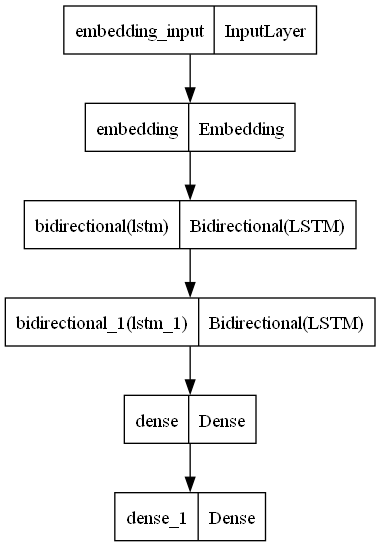

In [29]:
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# Rest of your code
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, to_file='model3.png', show_layer_names=True)

In [7]:
import tensorflow as tf
import numpy as np

In [37]:
model = tf.keras.models.load_model('nwp_bi_lstm.h5')

In [38]:
vocab_size

5045

In [39]:
# tokenizer = tf.keras.preprocessing.text.Tokenizer()
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
#         print(vocab_array[np.argsort(model.predict(text_padded)) - 1].ravel()[:-3])
        text += " " + prediction
    return text

In [40]:
make_prediction("pirates", 5)

1/1 [==============================] - 0s 17ms/step


"pirates of the caribbean at world's"